In [249]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<h1>Data Cleaning</h1>

In [250]:
df = pd.read_csv('data.csv')

In [251]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [253]:
df.nunique()

LoanID            255347
Age                   52
Income            114620
LoanAmount        158729
CreditScore          550
MonthsEmployed       120
NumCreditLines         4
InterestRate        2301
LoanTerm               5
DTIRatio              81
Education              4
EmploymentType         4
MaritalStatus          3
HasMortgage            2
HasDependents          2
LoanPurpose            5
HasCoSigner            2
Default                2
dtype: int64

In [254]:
df = df.drop(["LoanID"], axis=1)

In [255]:
df["Default"].sum() / df.shape[0]

np.float64(0.11612824901017048)

<h2>Missing Value</h2>

In [256]:
df.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

<h1>Visualization</h1>

In [257]:
def show_numeric(cols, n_cols=4):
    n_rows = int(np.ceil(len(cols) / n_cols))

    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        sns.boxplot(x='Default', y=col, data=df, color='skyblue', ax=axes[i])
        axes[i].set_title(col, fontsize=12)
        
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

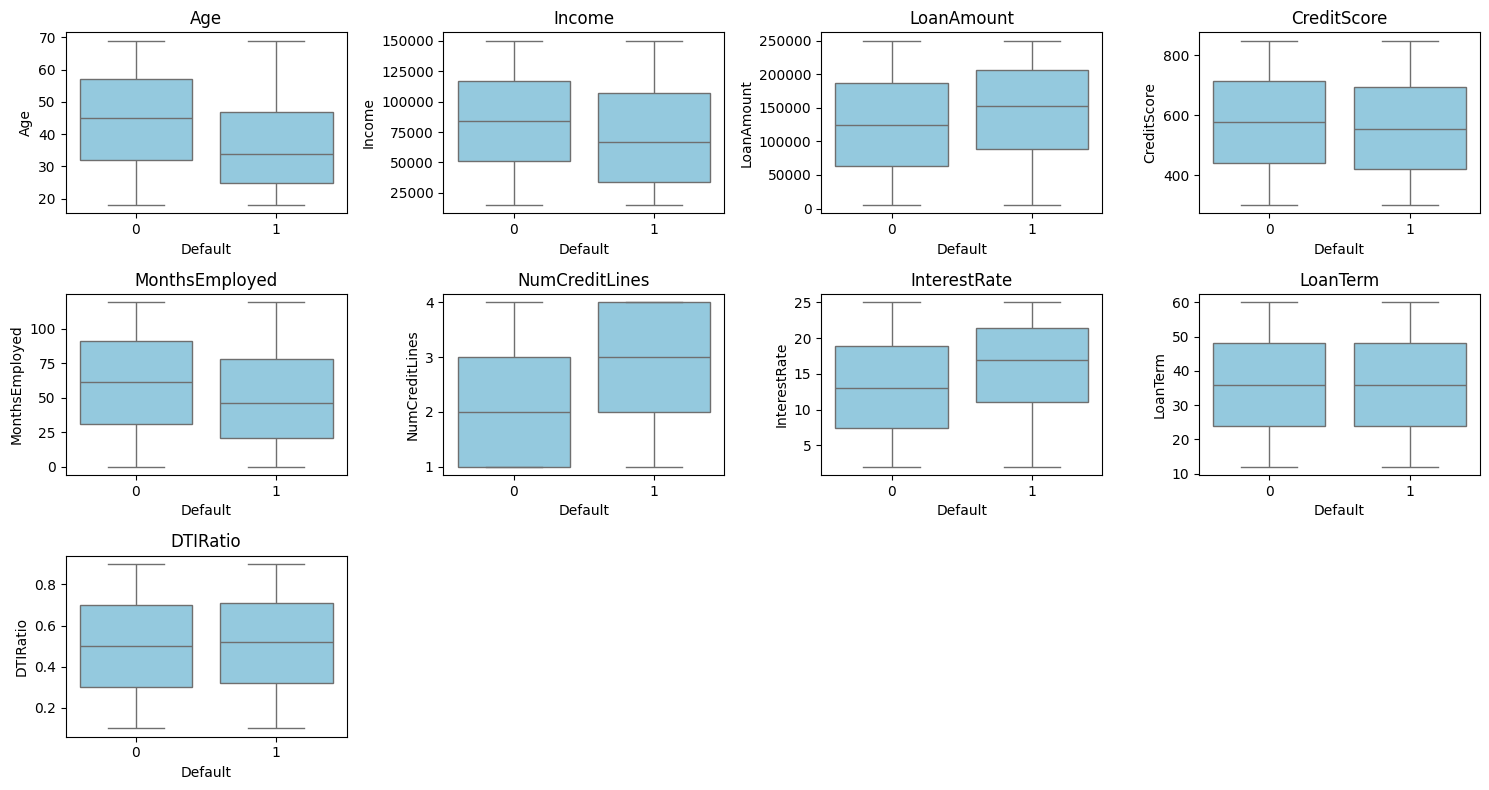

In [258]:
numeric_cols_all = df.select_dtypes(include=np.number).columns
numeric_cols = []
for col in numeric_cols_all:
    if col != "Default":
        numeric_cols.append(col)
show_numeric(numeric_cols)

In [259]:
def show_categorical(cols, n_cols=4):
    n_rows = int(np.ceil(len(cols) / n_cols))

    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        sns.countplot(x=col, hue='Default', data=df, palette="dark:skyblue", ax=axes[i])
        axes[i].set_title(col, fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)
        
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

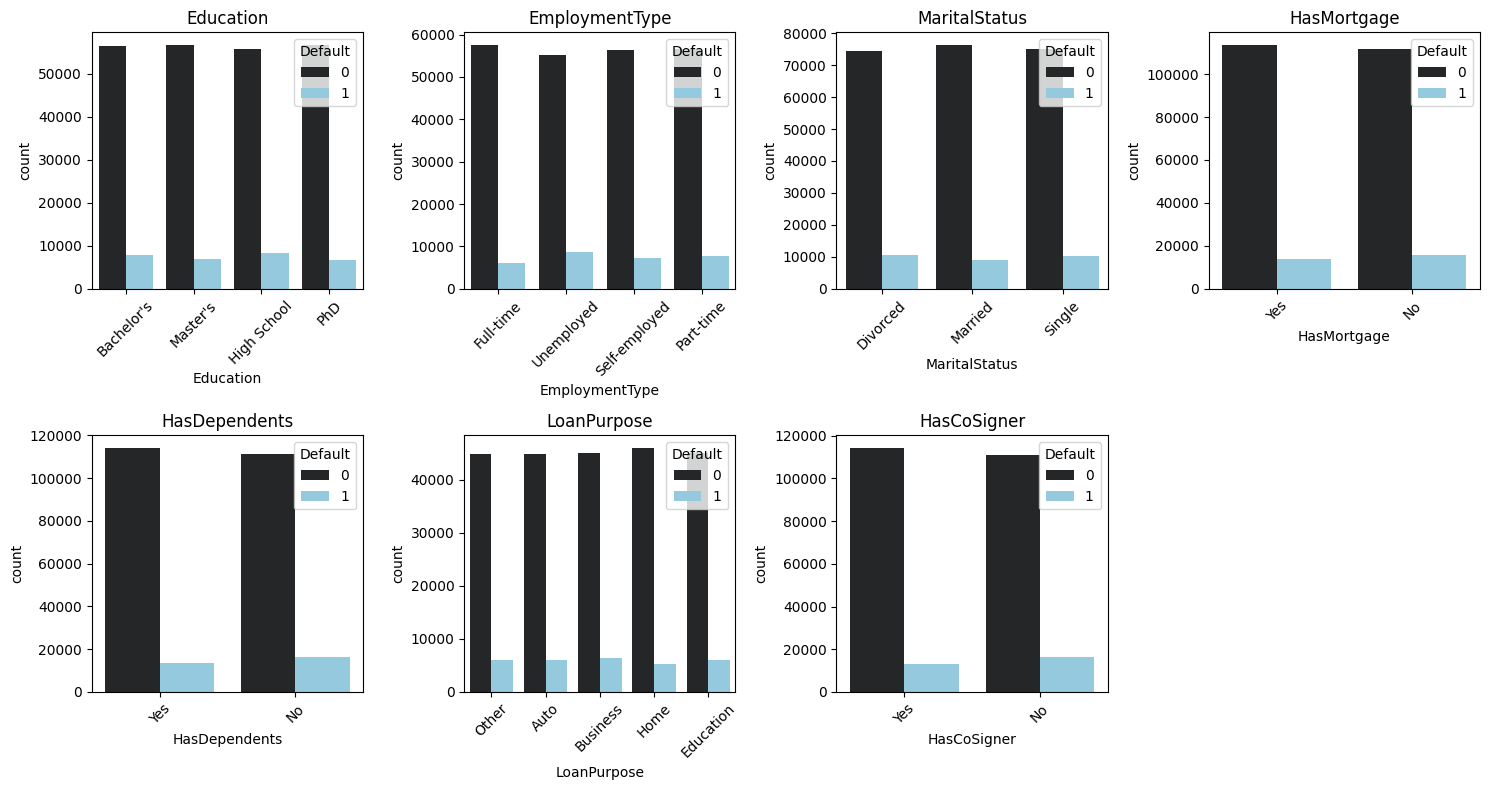

In [260]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
show_categorical(categorical_cols)

<h1>Models</h1>

In [261]:
X = df.drop('Default', axis=1)
y = df['Default']

In [262]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [263]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  int64  
 8   DTIRatio                      255347 non-null  float64
 9   Education_High School         255347 non-null  bool   
 10  Education_Master's            255347 non-null  bool   
 11  Education_PhD                 255347 non-null  bool   
 12  EmploymentType_Part-time      255347 non-nul

In [264]:
boolean_columns = X_encoded.select_dtypes(include='bool').columns

for col in boolean_columns:
    X_encoded[col] = X_encoded[col].astype(int)

In [265]:
X = X_encoded

In [266]:
def normalize_col(col):
    X[col]=(X[col]-X[col].mean())/X[col].std()

In [267]:
cols_to_normalize = ["Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed", "NumCreditLines", 
                  "InterestRate", "LoanTerm", "DTIRatio"]
for col in X.columns:
    normalize_col(col)

In [269]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [270]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [271]:
def evaluate(y_label, y_pred, show_confusion_m=False):
    print("Accuracy:", accuracy_score(y_label, y_pred))
    print("\nClassification Report:\n", classification_report(y_label, y_pred))
    
    if show_confusion_m:
        cm_lr = confusion_matrix(y_label, y_pred)
        sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

def evaluate_model(model, show_confusion_m=False):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print("\nTraining\n")
    evaluate(y_train, y_pred_train, show_confusion_m)

    print("\nTest\n")
    evaluate(y_test, y_pred_test, show_confusion_m)

def evaluate_regression_pred(y_label, y_pred_prob, show_confusion_m, threshold):
    mse = mean_squared_error(y_label, y_pred_prob)
    r2 = r2_score(y_label, y_pred_prob)
    
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)

    y_pred = np.where(y_pred_prob < threshold, 0, 1)

    evaluate(y_label, y_pred, show_confusion_m)

def evaluate_regression_model(model, show_confusion_m=False, threshold=0.5):

    y_pred_prob_train = model.predict(X_train)
    y_pred_prob_test = model.predict(X_test)
      
    print("\nTraining\n")
    evaluate_regression_pred(y_train, y_pred_prob_train, show_confusion_m, threshold)

    print("\nTest\n")
    evaluate_regression_pred(y_test, y_pred_prob_test, show_confusion_m, threshold)

<h2>Linear Regression<span style="font-size: 12px">view as a regression task</span></h2>

In [272]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_linear_reg = LinearRegression()
model_linear_reg.fit(X_train, y_train)

LinearRegression()

In [273]:
evaluate_regression_model(model_linear_reg)


Training

Mean Squared Error: 0.0943229436982133
R2 Score: 0.08104241375278487
Accuracy: 0.8838733680247899

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94    180555
           1       0.00      0.00      0.00     23722

    accuracy                           0.88    204277
   macro avg       0.44      0.50      0.47    204277
weighted avg       0.78      0.88      0.83    204277


Test

Mean Squared Error: 0.09390955651488833
R2 Score: 0.08512523690216389
Accuracy: 0.8838652829449775

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     45139
           1       0.00      0.00      0.00      5931

    accuracy                           0.88     51070
   macro avg       0.44      0.50      0.47     51070
weighted avg       0.78      0.88      0.83     51070



/Users/yzhang/miniconda3/envs/data/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yzhang/miniconda3/envs/data/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yzhang/miniconda3/envs/data/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [274]:
evaluate_regression_model(model_linear_reg, threshold=0.3)


Training

Mean Squared Error: 0.0943229436982133
R2 Score: 0.08104241375278487
Accuracy: 0.8841328196517474

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94    180555
           1       0.51      0.09      0.15     23722

    accuracy                           0.88    204277
   macro avg       0.70      0.54      0.55    204277
weighted avg       0.85      0.88      0.85    204277


Test

Mean Squared Error: 0.09390955651488833
R2 Score: 0.08512523690216389
Accuracy: 0.8843156451928725

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     45139
           1       0.51      0.09      0.15      5931

    accuracy                           0.88     51070
   macro avg       0.70      0.54      0.55     51070
weighted avg       0.85      0.88      0.85     51070



In [275]:
y_pred_prob_test = model_linear_reg.predict(X_test)

In [276]:
y_pred = np.where(y_pred_prob_test < 0.5, 0, 1)

In [277]:
accuracy_score(y_test, y_pred)

0.8838652829449775

In [278]:
y_test

211648    0
201101    0
140423    0
204530    0
166481    0
         ..
121374    1
131794    0
227111    0
58432     0
95842     0
Name: Default, Length: 51070, dtype: int64

In [279]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(51070,))

In [280]:
classification_report(y_test, y_pred)

/Users/yzhang/miniconda3/envs/data/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yzhang/miniconda3/envs/data/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yzhang/miniconda3/envs/data/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

'              precision    recall  f1-score   support\n\n           0       0.88      1.00      0.94     45139\n           1       0.00      0.00      0.00      5931\n\n    accuracy                           0.88     51070\n   macro avg       0.44      0.50      0.47     51070\nweighted avg       0.78      0.88      0.83     51070\n'

In [281]:
model_linear_reg_resampled = LinearRegression()
model_linear_reg_resampled.fit(X_train_resampled, y_train_resampled)

LinearRegression()

In [282]:
evaluate_regression_model(model_linear_reg_resampled)


Training

Mean Squared Error: 0.20380294723421175
R2 Score: -0.9855854484317523
Accuracy: 0.6788772108460571

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.68      0.79    180555
           1       0.22      0.68      0.33     23722

    accuracy                           0.68    204277
   macro avg       0.58      0.68      0.56    204277
weighted avg       0.86      0.68      0.74    204277


Test

Mean Squared Error: 0.204046757197352
R2 Score: -0.9878405945002358
Accuracy: 0.679635794008224

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.68      0.79     45139
           1       0.22      0.70      0.34      5931

    accuracy                           0.68     51070
   macro avg       0.58      0.69      0.56     51070
weighted avg       0.86      0.68      0.74     51070



<h2>Logistic Regression</h2>

In [283]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [284]:
evaluate_model(model_logistic)


Training

Accuracy: 0.885102091767551

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94    180555
           1       0.59      0.03      0.06     23722

    accuracy                           0.89    204277
   macro avg       0.74      0.52      0.50    204277
weighted avg       0.85      0.89      0.84    204277


Test

Accuracy: 0.885275112590562

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.61      0.03      0.06      5931

    accuracy                           0.89     51070
   macro avg       0.75      0.52      0.50     51070
weighted avg       0.85      0.89      0.84     51070

